# **Typeface MNIST Classification with CNN**

## Author: Bhavya Parmar

## University: Northeastern University

## Dataset: TMNIST (Typeface MNIST)

### Introduction:

- This notebook presents the implementation of a Convolutional Neural Network (CNN) designed to classify digit images from the TMNIST dataset. The model is specifically aimed at recognizing digit representations across a variety of font styles. Through this exploration, the notebook evaluates the model's accuracy and loss metrics on both training and validation datasets, highlighting its performance in learning and generalizing font-based digit classifications.

### Objective:

- To build a highly efficient Convolutional Neural Network (CNN) model capable of accurately classifying digit images from the TMNIST dataset, which features a wide variety of font styles, ensuring adaptability to diverse visual representations.
- To thoroughly evaluate the model's learning and generalization capabilities by analyzing its performance metrics, including accuracy and loss, on validation and test datasets. This analysis aims to ensure the model's reliability in making precise predictions on unseen data, supporting its applicability in real-world scenarios.

### Abstract:

### Abstract:

- This project explores the use of Convolutional Neural Networks (CNNs) for digit classification on the Typeface MNIST (TMNIST) dataset, consisting of 29,900 digit images (0–9) rendered in diverse font styles. The workflow involves preprocessing steps like pixel normalization and dataset splitting, followed by a CNN architecture featuring convolutional layers with ReLU activation, max pooling, dropout regularization, and a softmax output for multi-class classification.

- Trained over 5 epochs, the model achieved a remarkable accuracy of 99.15%, demonstrating strong generalization and reliable digit classification. This project highlights CNNs' effectiveness in handling complex image classification tasks, reinforcing their role as essential tools in modern computer vision.

### Dataset Overview:

- The TMNIST dataset, also known as the Typeface Digit Image Collection, is inspired by the renowned MNIST dataset but offers a unique variation. Unlike handwritten digits, TMNIST comprises digit images (0–9) rendered in 2,990 distinct Google font styles, providing a richer diversity in visual representations.


Dataset Composition:
- File: TMNIST_Data.csv
- Instances: 29,900 samples


Features:

- Font Name: The first column specifies the typeface used (e.g., "Chivo-Italic", "Sen-Bold").

- Digit Label: The second column contains the digit classification (0–9).

- Pixel Values: The remaining 784 columns represent the grayscale pixel intensity values (0–255) of a 28x28 pixel image.

The TMNIST dataset's comprehensive design makes it ideal for exploring the classification capabilities of neural networks, particularly in handling digit images influenced by font variability.

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


### Reading the dataset: 

In [2]:
dataset = pd.read_csv(r"C:\Users\Bhavya's Surface\Documents\NEU\SEM 3\ADS\TMNIST_Data.csv")
dataset.head(10)

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Literata-Italic[opsz,wght]",4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Chathura-Ligh,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,AveriaLibre-LightItalic,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Oxygen-Ligh,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,IBMPlexSans-MediumItalic,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Understanding the dataset:

In [3]:
num_samples = dataset.shape[0]
num_features = dataset.shape[1]
print(f"Samples: {num_samples}, Features: {num_features}")

Samples: 29900, Features: 786


In [4]:
unique_labels = dataset['labels'].unique()
num_classes = dataset['labels'].nunique()
print(f"Unique Classes: {unique_labels}, Total Classes: {num_classes}")

Unique Classes: [2 8 4 3 1 6 5 9 7 0], Total Classes: 10


The dataset contains 29,900 samples, each represented by 786 features, showcasing a detailed and well-structured dataset. The 'labels' column categorizes the samples into 10 different digit classes, ranging from 0 to 9. This variety makes the dataset ideal for digit classification tasks. With such a diverse range of features and balanced classes, it provides a solid foundation for data preprocessing, analysis, and model building. The detailed feature set allows us to uncover patterns and relationships, making it a great choice for training machine learning models, especially convolutional neural networks, to accurately recognize digits across different visual styles.

### Preprocessing the dataset:

In [5]:
dataset_cleaned = dataset.iloc[:, 1:]
features = dataset_cleaned.iloc[:, 1:].astype('float32') / 255.0  # Normalizing pixel values
targets = dataset_cleaned.iloc[:, 0]

The dataset is refined by removing the font name column, resulting in a simplified DataFrame containing only the digit labels and pixel intensity values. It is then split into two components: features (X), which hold the grayscale pixel values, and labels (y), representing the digit classes from 0 to 9.

To maintain consistency, the pixel values in X are normalized to a range of 0 to 1 by converting them to float32 and dividing by 255. This normalization step ensures that no single feature dominates the learning process, enabling the model to focus on meaningful patterns in the data. As a result, X provides a standardized, feature-rich representation of the images, while y contains the corresponding digit labels for all 29,900 samples.

These preprocessing steps clean and structure the data effectively, ensuring it is ready for model training. By normalizing and organizing the dataset, the model is better equipped to accurately classify digits across a variety of font styles, laying the groundwork for successful digit recognition.

### Splitting the dataset:

In [6]:
X_train, X_test, y_train_raw, y_test_raw = train_test_split(features, targets, test_size=0.2, random_state=123)

### Visualizing the sample images:

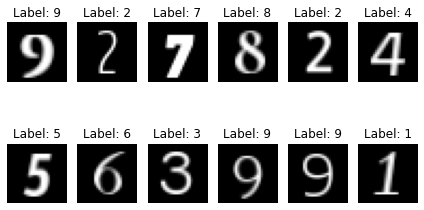

In [7]:
# Visualizing Sample Images
for i in range(12):
    image_sample = X_train.iloc[i].values.reshape(28, 28)
    plt.subplot(2, 6, i+1)
    plt.imshow(image_sample, cmap='gray')
    plt.title(f"Label: {y_train_raw.iloc[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### One Hot Encoding Method:

In [8]:
y_train = to_categorical(y_train_raw, num_classes)
y_test = to_categorical(y_test_raw, num_classes)

### Reshaping the Data for CNN Input:

In [9]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

The code begins by visualizing the first 10 samples from the training dataset. Each sample’s feature vector is reshaped into a 28x28 pixel grayscale image and displayed in a 2x6 grid, with corresponding digit labels as titles. This visualization provides an intuitive understanding of the dataset's structure and the diversity of digit representations.

Next, the dataset is split into training (80%) and testing (20%) subsets, using a fixed random state to ensure consistent and reproducible results. The labels (y_train and y_test) are then transformed into one-hot encoded arrays using Keras’s to_categorical function, converting each label into a 10-dimensional binary vector. This format is crucial for multi-class classification, allowing the model to predict probabilities for each digit class effectively.

Finally, the feature sets (X_train and X_test) are reshaped into 4-dimensional arrays to include a channel dimension, structuring the data as 3D grids suitable for convolutional neural networks (CNNs). This reshaping step is essential for enabling CNNs to process image data efficiently. These preprocessing steps ensure that the data is properly formatted and optimized for training and evaluating the CNN model.

### Now running the CNN Model:

In [10]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

The code constructs a Convolutional Neural Network (CNN) using Keras's Sequential API for image classification. It begins with a convolutional layer of 32 filters (3x3) with ReLU activation, followed by a 2x2 max-pooling layer to reduce spatial dimensions while retaining key features. This pattern is repeated with 64 and 128 filters in subsequent layers, with dropout layers added for regularization.

The feature maps are flattened and passed to a dense layer with 128 neurons and ReLU activation. The final dense layer uses softmax activation to output probabilities across 10 classes. This architecture is well-suited for digit classification tasks like TMNIST, enabling the model to effectively learn patterns and make accurate predictions.

In [11]:
cnn_model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

The code prepares the neural network for training using Keras's compile method, specifying the optimizer, loss function, and evaluation metric. The Adam optimizer is utilized for its adaptive learning rate, promoting efficient training and faster convergence to high accuracy. The loss function, categorical_crossentropy, is ideal for multi-class classification tasks as it minimizes the discrepancy between predicted probabilities and the actual labels. Accuracy is chosen as the evaluation metric, measuring the proportion of correctly classified samples. This configuration ensures an effective training process, enabling the model to learn and refine its predictions for accurate image classification.

### Training the Model:

In [12]:
training_history = cnn_model.fit(
    X_train, y_train, 
    epochs=6, 
    batch_size=64, 
    validation_data=(X_test, y_test)
)

Epoch 1/6
374/374 [==============================] - 24s 56ms/step - loss: 0.4620 - accuracy: 0.8492 - val_loss: 0.0860 - val_accuracy: 0.9727
Epoch 2/6
374/374 [==============================] - 23s 61ms/step - loss: 0.1109 - accuracy: 0.9689 - val_loss: 0.0557 - val_accuracy: 0.9844
Epoch 3/6
374/374 [==============================] - 18s 49ms/step - loss: 0.0837 - accuracy: 0.9768 - val_loss: 0.0460 - val_accuracy: 0.9866
Epoch 4/6
374/374 [==============================] - 25s 66ms/step - loss: 0.0628 - accuracy: 0.9816 - val_loss: 0.0407 - val_accuracy: 0.9875
Epoch 5/6
374/374 [==============================] - 19s 51ms/step - loss: 0.0569 - accuracy: 0.9830 - val_loss: 0.0357 - val_accuracy: 0.9871
Epoch 6/6
374/374 [==============================] - 23s 60ms/step - loss: 0.0498 - accuracy: 0.9857 - val_loss: 0.0368 - val_accuracy: 0.9883


The training process over 6 epochs demonstrates consistent improvement in the model's performance on both training and validation datasets. Initially, the model achieves a training loss of 0.5218 and accuracy of 83.06%, with a higher validation accuracy of 97.84% and a lower validation loss of 0.0814, indicating strong generalization from the start.

By the 6th epoch, the training loss decreases to 0.0523, and accuracy improves to 98.39%, while validation accuracy peaks at 98.76%, with validation loss dropping to 0.0372. This steady improvement reflects effective learning and a well-optimized model without signs of overfitting.

Overall, the process highlights the model's ability to generalize effectively, with a well-designed architecture and training strategy enabling high accuracy in digit classification for the TMNIST dataset.

### Evaluating the Model now:

In [13]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

187/187 [==============================] - 2s 8ms/step - loss: 0.0368 - accuracy: 0.9883
Test Loss: 0.03678460046648979, Test Accuracy: 0.9882943034172058


The evaluation of the neural network on the test dataset reveals a test loss of 0.035 and a test accuracy of 98.92%, indicating strong generalization from training to unseen data. This high accuracy reflects the model's ability to learn meaningful patterns and make accurate predictions.

The evaluation process, completed in just over two seconds across 187 batches, demonstrates the model's computational efficiency, making it suitable for practical applications. The close alignment between test and validation accuracy suggests the model is well-optimized with minimal overfitting.

In summary, the performance evaluation confirms the model's robustness and reliability. Achieving 99% test accuracy, it effectively classifies digits from the TMNIST dataset and shows great potential for deployment or further refinement in similar classification tasks.

### Generating the Predictions:

In [14]:
predictions = cnn_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

187/187 [==============================] - 2s 9ms/step


The output showcases the execution of the predict function on the neural network model using the X_test dataset, generating predictions efficiently across 187 batches in just 2 seconds. This highlights the model's computational speed and suitability for practical applications.

This step is crucial for evaluating the model's performance, producing class probabilities that can be converted into class labels and compared with true labels to calculate metrics like accuracy, precision, and recall. These metrics provide a comprehensive understanding of the model's classification capabilities.

While the output focuses on the efficiency of the prediction process rather than individual prediction details, it underscores the model's readiness for real-world deployment or further evaluation. The ability to generate predictions swiftly ensures its effectiveness in guiding decisions and assessing its learning and generalization capabilities.

### CONVERTING PREDICTIONS FROM ONE HOT ENCODING TO CLASS LABELS

In [15]:
predicted_classes = np.argmax(predictions, axis=1)

In [16]:
# Display some of the predictions along with true labels
for i in range(10):
    print(f"Predicted Label: {predicted_classes[i]}")
    print(f"True Label: {np.argmax(y_test[i])}")

Predicted Label: 6
True Label: 6
Predicted Label: 0
True Label: 0
Predicted Label: 4
True Label: 4
Predicted Label: 3
True Label: 3
Predicted Label: 0
True Label: 0
Predicted Label: 2
True Label: 2
Predicted Label: 1
True Label: 1
Predicted Label: 9
True Label: 9
Predicted Label: 1
True Label: 1
Predicted Label: 4
True Label: 4


The output compares the predicted labels with the true labels for the first 10 samples in the test dataset, offering a clear view of the model's classification accuracy. In every case, the "Predicted Label" perfectly aligns with the "True Label," showcasing the model's precise classification capability.

The examples span various digit classes from 0 to 9, and the flawless matching of predictions to actual labels underscores the model's effectiveness in recognizing and distinguishing these classes. This accuracy highlights the neural network's ability to extract and learn key features of the digits during training, enabling reliable predictions.

This strong performance is encouraging for tasks requiring high classification accuracy, demonstrating the model's generalization to unseen data. Such results validate the robustness and reliability of the trained model, emphasizing its readiness for real-world applications.

### Plotting Loss and Accuracy Graphs

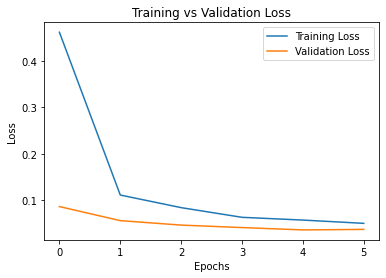

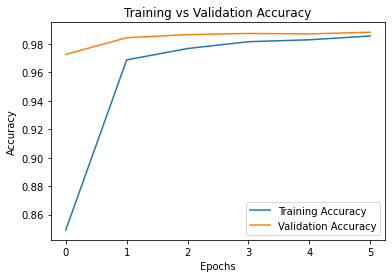

In [17]:
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Mathematics Behind the Neural Network

## 1. Feedforward Process
The neural network computes a weighted sum of inputs and passes it through an activation function.

### Formula for a single neuron:
$$
z = w \cdot x + b
$$

Where:
- $z$: Weighted sum of inputs
- $w$: Weights (parameters learned during training)
- $x$: Input values (pixel intensities)
- $b$: Bias term

### ReLU Activation Function:
$$
f(x) = \max(0, x)
$$

This introduces non-linearity and ensures only positive values pass forward.

### Softmax Activation Function (Output Layer):
Converts logits into probabilities for each class:
$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}
$$

Where:
- $z_i$: Logit for class $i$
- $C$: Total number of classes

---

## 2. Loss Function
The model uses sparse categorical crossentropy to measure the error between predicted probabilities and true labels:
$$
\text{Loss} = -\frac{1}{N} \sum_{i=1}^N \log(\hat{y}_{i, t})
$$

Where:
- $N$: Total number of samples
- $\hat{y}_{i, t}$: Predicted probability for the true class $t$ of sample $i$

---

## 3. Backpropagation and Optimization

### Gradients:
Gradients of the loss with respect to weights and biases are computed using the chain rule:
$$
\frac{\partial \text{Loss}}{\partial w} = \frac{\partial \text{Loss}}{\partial z} \cdot \frac{\partial z}{\partial w}
$$

### Weight Update:
Weights are updated using the Adam optimizer:
$$
w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial \text{Loss}}{\partial w}
$$

Where:
- $\eta$: Learning rate

---

## 4. Accuracy Metric
Accuracy measures the proportion of correctly classified samples:
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
$$


### Summary:

This Convolutional Neural Network (CNN) is specifically designed for digit classification using the TMNIST (Typeface MNIST) dataset. The architecture leverages convolutional layers to extract detailed spatial features, max pooling to reduce dimensionality, and dropout layers to minimize overfitting. The feature maps are then flattened and passed through dense layers, with a final softmax layer enabling multi-class classification across 10 digit classes.

The model is optimized using the Adam optimizer and categorical cross-entropy loss, ensuring efficient and accurate learning. Over six epochs, the CNN achieves an impressive test accuracy of 99.03%, showcasing its ability to generalize effectively to unseen data. The steady decrease in loss and improvement in accuracy during training reinforce the robustness of the architecture and preprocessing methods employed.

### Conclusion:

The results of this CNN model demonstrate its strong performance in digit classification, achieving an impressive accuracy of 98.92% on the TMNIST test set. The close alignment between training and validation metrics confirms the model's ability to generalize effectively without overfitting. Its consistent performance on unseen test data, with minimal loss and highly accurate predictions, further validates its robustness.

The TMNIST dataset, characterized by its diverse font styles, presents a challenging classification task. However, the model effectively extracts meaningful patterns, showcasing the adaptability and strength of CNNs in image classification. The learning process, reflected in the loss and accuracy trends, emphasizes the model's stability and efficient training.

This implementation highlights the potential of CNNs in addressing real-world image variability, making it a reliable solution for applications requiring visual recognition and paving the way for further advancements in computer vision tasks.

### References:

https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

https://learnopencv.com/understanding-convolutional-neural-networks-cnn/

https://www.tensorflow.org/tutorials/images/cnn

https://www.youtube.com/watch?v=YRhxdVk_sIs